In [1]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig, Preprocessing, Visualiser

# create an initial but optional config and an api client
config = ECConfig()
preprocessing = Preprocessing()
visualiser = Visualiser()
track_api = TrackAPI(api_client=DownloadClient(config=config))

Initializing pre-processing class
Initializing visualisation class


In [27]:
bbox = BboxSelector([
    7.554130554199218, # min_x
    51.95590322041212, # min_y
    7.590351104736328, # max_x
    51.97874790276371  # max_y
])


# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=10) # requesting 10 tracks inside the bbox

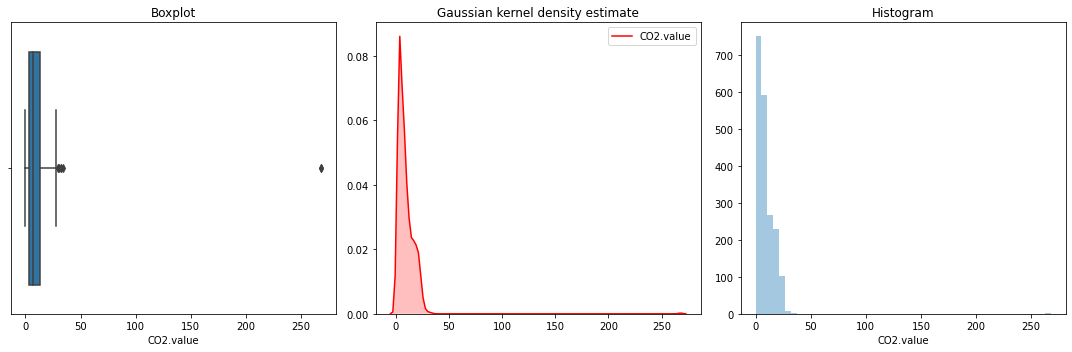

In [3]:

visualiser.plot_distribution(track_df, 'CO2.value')

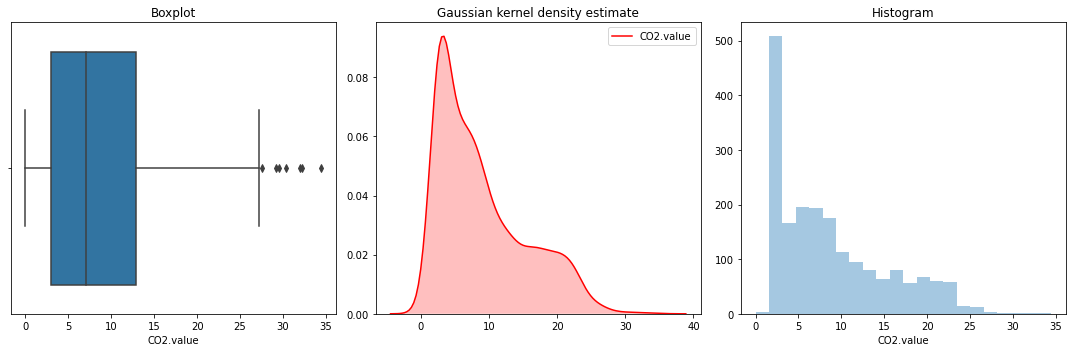

In [28]:
track_df = preprocessing.remove_outliers(track_df, 'CO2.value')
visualiser.plot_distribution(track_df, 'CO2.value')

In [20]:
visualiser.plot_point_values(track_df, "CO2.value")

In [115]:
single_track_id = track_df['track.id'].unique()[1]
single_track = track_df[track_df['track.id'] == single_track_id]
visualiser.plot_point_values(single_track, "CO2.value")

In [117]:
# interpolated = preprocessing.interpolate(track_df)
# visualiser.plot_point_values(interpolated, "CO2.value")



interpolated_points = preprocessing.interpolate(single_track)
visualiser.plot_point_values(interpolated_points, "CO2.value")

Amount of points before interpolation (138, 54)
21
Amount of points after interpolation (5658, 54)


In [119]:
track_df = preprocessing.calculateAcceleration(track_df)

interpolated_points_full = preprocessing.interpolate(track_df)
visualiser.plot_point_values(interpolated_points_full, "Acceleration.value")

Amount of points before interpolation (1952, 56)
Amount of points after interpolation (7827, 56)
Amount of points after interpolation (68, 56)
Amount of points after interpolation (504, 56)
Amount of points after interpolation (128, 56)
Amount of points after interpolation (921, 56)
Amount of points after interpolation (921, 56)
Amount of points after interpolation (565, 56)
Amount of points after interpolation (929, 56)
Amount of points after interpolation (1036, 56)
Amount of points after interpolation (136, 56)


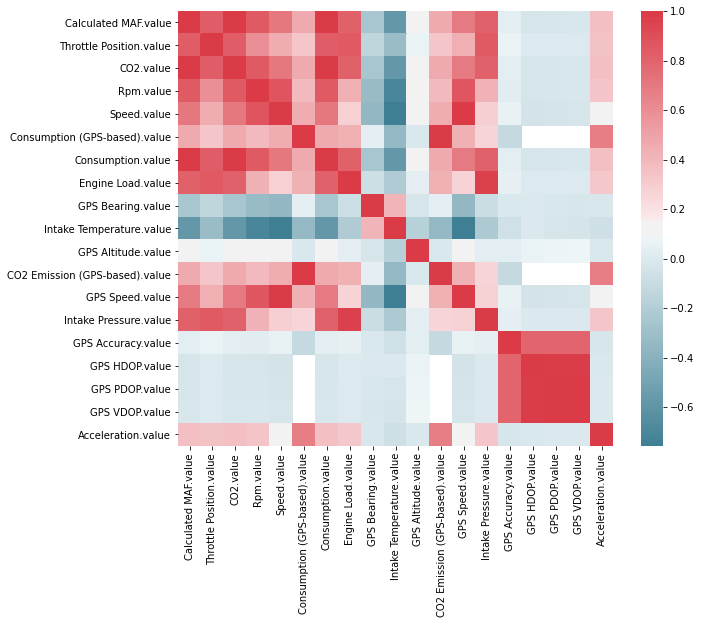

In [7]:
visualiser.plot_full_correlation(track_df)

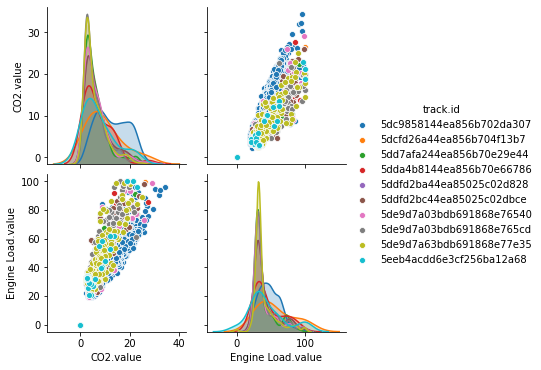

In [8]:
visualiser.plot_pair_correlation(track_df, "CO2.value", "Engine Load.value", 'id', False)

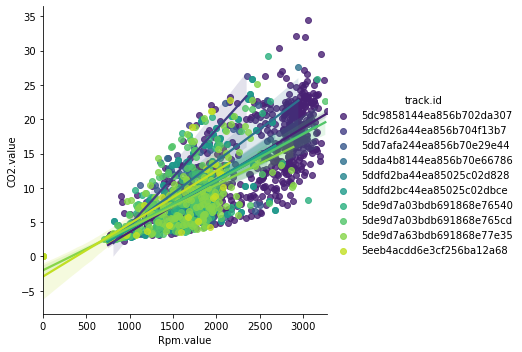

In [9]:
visualiser.plot_pair_correlation(track_df, "Rpm.value", "CO2.value", "id", True)

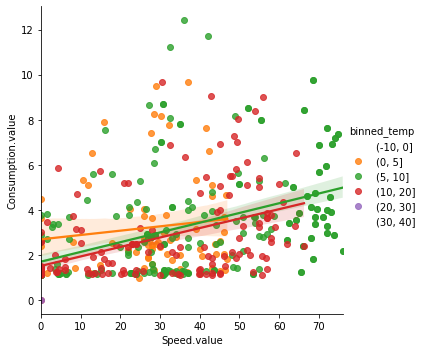

In [14]:
beginning_drive = preprocessing.split_beginning(track_df, 300)
beginning_drive = preprocessing.calculateAcceleration(beginning_drive)

visualiser.plot_pair_correlation(beginning_drive, "Speed.value", "Consumption.value", "temperature", True)